# Project: Analyze Mexico Real Estate Listings Dataset

### By Mohan Bakshi

#### __Introduction__

In this Real Estate Listings Analysis project, we delves into a comprehensive exploration of the Mexican real estate market using data from Properati. Properati stands as a prominent entity, offering a diverse range of property listings for both sale and rent across Mexico.

Our objective in this project is to leverage data analytics techniques to gain valuable insights into the dynamics of the real estate market in Mexico. By investigating crucial aspects such as property type, price trends, geographic distribution, and consumer preferences, we hope to deliver practical recommendations and insights to Properati's clients and stakeholders.

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate
import seaborn as sns

In [2]:
# Importing dataset
df = pd.read_csv('properati_properties_Mexico.csv', 
                 na_values=':',
                 usecols=['price', 'lat', 'lon', 'price_usd_per_m2', 'surface_total_in_m2', 
                          'price_aprox_local_currency', 'expenses', 'rooms', 'price_aprox_usd', 'price_per_m2',
                          'operation', 'property_type', 'currency', 'place_with_parent_names', 'id', 
                          'place_name', 'title', 'created_on', 'state_name', 'country_name' ])

#### 1. Exploring Dataset

In this section, we will explore the dataset. 

In [3]:
# Displaying shape and first 5 records.
display(df.shape)
display(df.head(10))

(3396421, 20)

,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,price_per_m2,rooms,expenses,title
0,f148cbb2c2ff6ad7476f44d219b7af14bc717754,2015-01-05,rent,house,Morelos,|México|Morelos|,México,Morelos,18.824124,-98.948113,10000.0,MXN,11184.51,631.99,500.0,1.263980,NaN,NaN,NaN,LINDA CASA EN ZONA COMERCIAL IDEAL PARA OFICINAS
1,5450e023897c87100feb23fc4d5ecec1ac1658d4,2015-01-05,rent,house,Morelos,|México|Morelos|,México,Morelos,18.825402,-98.946803,20000.0,MXN,22485.30,1270.55,480.0,2.646979,NaN,NaN,NaN,PRECIOSA CASA SOBRE AVENIDA IMPORTANTE
2,e11cfdc485256c33a8af75e9b614293efdea5c05,2015-01-05,rent,store,Morelos,|México|Morelos|,México,Morelos,18.823515,-98.949789,5000.0,MXN,5652.51,319.40,180.0,1.774444,NaN,NaN,NaN,INTERESANTE LOCAL EN RENTA FRENTE AL CANARIO
3,c108c5e0def8a486e4d43945aa4e7cef1dda5cae,2015-01-05,rent,store,Tabasco,|México|Tabasco|,México,Tabasco,17.994583,-93.386271,8000.0,MXN,7586.83,428.70,528.0,0.811932,NaN,NaN,NaN,"Plaza Moro, Cardenas, Tabasco"
4,577da74be713b9df810ef4e5100d9c374bb7441f,2015-02-22,rent,house,Querétaro,|México|Querétaro|,México,Querétaro,NaN,NaN,10000.0,MXN,11711.01,661.74,NaN,NaN,62.500000,NaN,NaN,Casa en Renta en San Juan del Río
5,3f5b9f5ab49cdc89d834e665634841f2a70f1047,2015-01-24,rent,apartment,Nuevo León,|México|Nuevo León|,México,Nuevo León,NaN,NaN,22462.0,MXN,25253.33,1426.96,0.0,NaN,NaN,NaN,NaN,Departamentos EQUIPADOS en RENTA Zona Valle Po...
6,fe754f01117c46733844ccf321e659e12dd14f8a,2015-02-24,rent,store,Nuevo León,|México|Nuevo León|,México,Nuevo León,NaN,NaN,19000.0,MXN,22115.43,1249.65,NaN,NaN,158.333333,NaN,NaN,Local en Renta en Guadalupe
7,a7d5d14136257d5479cf25615a00b6028f93be9c,2015-02-20,rent,house,Quintana Roo,|México|Quintana Roo|,México,Quintana Roo,21.133346,-86.861353,12500.0,MXN,14638.67,827.17,NaN,NaN,65.789474,NaN,NaN,Casa en Renta en Benito Juárez
8,f93ba874f15960a6a122876a8787145a97eaeee9,2014-11-20,rent,apartment,Quintana Roo,|México|Quintana Roo|,México,Quintana Roo,18.509356,-88.314668,4150.0,MXN,4761.45,269.05,NaN,NaN,103.750000,1.0,NaN,Loft amueblado en el centro con servicios incl...
9,7d3d97a0e9356ae9dd23e77305fd143dabd40446,2014-11-20,rent,store,Quintana Roo,|México|Quintana Roo|,México,Quintana Roo,18.509356,-88.314668,4000.0,MXN,4589.44,259.33,NaN,NaN,333.333333,NaN,NaN,"Local para Casa de Cambio en Centrico Hotel, S..."


In [4]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3396421 entries, 0 to 3396420
Data columns (total 20 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   id                          object 
 1   created_on                  object 
 2   operation                   object 
 3   property_type               object 
 4   place_name                  object 
 5   place_with_parent_names     object 
 6   country_name                object 
 7   state_name                  object 
 8   lat                         float64
 9   lon                         float64
 10  price                       float64
 11  currency                    object 
 12  price_aprox_local_currency  float64
 13  price_aprox_usd             float64
 14  surface_total_in_m2         float64
 15  price_usd_per_m2            float64
 16  price_per_m2                float64
 17  rooms                       float64
 18  expenses                    float64
 19  title                

This DataFrame summary provides information about a Mexico real estate dataset with 20 columns and approximately 3.4 million entries:

1. __Data Types:__
- There are ten columns with floating-point data types (float64), typically used for numerical data like prices, areas, and room counts.
- Ten columns have object data types, which usually represent categorical or text data, such as IDs, operation types, property types, locations, currencies, and titles.
- The 'created_on' column, although labeled as object type, likely contains date or timestamp data.

2. __Column Information:__

The DataFrame contains various property-related information, including IDs, creation dates, operation types (e.g., sale or rent), property types (e.g., apartment, house), location details (place names, parent names, country, state), geographical coordinates (latitude and longitude), prices in different currencies, property sizes (total surface area, price per square meter), room counts, expenses, and property titles.

In [5]:
# Classifying column into categorical and quantitaive columns

def check_columns(df: pd.DataFrame):
    columns = df.columns
    quantitative_columns = list(set(df._get_numeric_data().columns))
    categorical_columns = list(set(columns) - set(quantitative_columns))
    return quantitative_columns, categorical_columns

quan_cols, cat_cols = check_columns(df)
print(f'Quantitative columns are: {quan_cols}')
print(f'Categorical columns are: {cat_cols}')

Quantitative columns are: ['lat', 'price_per_m2', 'price_aprox_usd', 'expenses', 'price', 'surface_total_in_m2', 'rooms', 'price_usd_per_m2', 'lon', 'price_aprox_local_currency']
Categorical columns are: ['place_with_parent_names', 'property_type', 'country_name', 'state_name', 'currency', 'place_name', 'created_on', 'id', 'operation', 'title']


The dataset consists of both quantitative and categorical columns:

1. **Quantitative Columns**:
   - __price__: Represents the price of the property.
   - __lat and lon__: Latitude and longitude coordinates of the property location.
   - __price_usd_per_m2__: Price per square meter in USD.
   - __surface_total_in_m2__: Total surface area of the property in square meters.
   - __price_aprox_local_currency__: Approximate price in the local currency.
   - __expenses__: Additional expenses related to the property.
   - __rooms__: Number of rooms in the property.
   - __price_aprox_usd__: Approximate price in USD.
   - __price_per_m2__: Price per square meter.

2. **Categorical Columns**:
   - __operation__: Type of property operation (e.g., sale, rental).
   - __property_type__: Type of property (e.g., apartment, house).
   - __currency__: Currency used for pricing.
   - __place_with_parent_names__: Location hierarchy including parent names.
   - __id__: Unique identifier for each property.
   - __place_name__: Name of the place where the property is located.
   - __title__: Title or description of the property.
   - __created_on__: Date when the property listing was created.
   - __state_name__: Name of the state or region where the property is located.
   - __country_name__: Name of the country where the property is located.

In [6]:
# Statistical information about the dataframe
df.describe()

,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,price_per_m2,rooms,expenses
count,2.480478e+06,2.480478e+06,3.358911e+06,3.358911e+06,3.358911e+06,1.702984e+06,1.226410e+06,2.802040e+06,114589.000000,2.257900e+04
mean,2.093369e+01,-9.876158e+01,2.643961e+06,3.266251e+06,1.787313e+05,4.488242e+02,7.536001e+02,1.621425e+04,2.865956,2.631509e+03
std,2.990206e+00,5.341055e+00,6.416914e+06,8.702311e+06,4.755819e+05,3.331339e+03,1.785712e+03,4.809894e+05,1.109116,2.711193e+04
min,-2.869301e+01,-1.316414e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.330000e+02,-6.998428e+04,3.972611e-06,1.000000,1.000000e+00
25%,1.922986e+01,-1.003984e+02,3.690000e+05,4.512499e+05,2.476366e+04,6.000000e+01,2.251490e+02,5.500000e+03,2.000000,3.500000e+02
50%,2.038247e+01,-9.924189e+01,1.390000e+06,1.555766e+06,8.505327e+04,1.550000e+02,5.408698e+02,1.036364e+04,3.000000,1.000000e+03
75%,2.112955e+01,-9.813249e+01,2.990000e+06,3.374615e+06,1.843313e+05,3.100000e+02,9.238062e+02,1.514899e+04,3.000000,2.600000e+03
max,8.998116e+01,1.052345e+02,9.500000e+08,9.452642e+08,4.954910e+07,2.000000e+05,3.706319e+05,1.995000e+08,28.000000,1.800000e+06


Based on the dataset’s descriptive statistics:

1. **Location Data**:
   - The latitude (lat) spans from -28.69 to 89.98 degrees, with an average of 20.93 degrees.
   - The longitude (lon) runs from roughly -131.64 to 105.23 degrees, with an average of -98.76 degrees.
   - These values indicate a large regional spread of attributes in the dataset.

2. **Price and Currency**:
   - The 'price' column displays a range of property prices, from 0 to 950 million units of local currency.
   - The 'price_aprox_local_currency' and 'price_aprox_usd' columns show a wide range of prices, as evidenced by the significant standard deviations.
   - The mean and median prices differ significantly, demonstrating that prices do not follow a normal distribution.

3. **Property Size and Cost per Unit Area**:
   - The'surface_total_in_m2' column shows different property sizes, from small to large expanses.
   - The terms 'price_usd_per_m2' and 'price_per_m2' denote the cost per square metre, demonstrating how property valuation varies with size.
   - The standard deviations for these columns indicate significant variation in pricing per unit area between properties.

4. **Property Characteristics**:
   - The 'rooms' column shows the number of rooms in the property, with a minimum of one room.
   - The 'expenses' column displays additional property-related expenses with a wide range of values and a high standard deviation.


In [7]:
# Dropping column
df.drop(['place_with_parent_names'], inplace = True, axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3396421 entries, 0 to 3396420
Data columns (total 19 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   id                          object 
 1   created_on                  object 
 2   operation                   object 
 3   property_type               object 
 4   place_name                  object 
 5   country_name                object 
 6   state_name                  object 
 7   lat                         float64
 8   lon                         float64
 9   price                       float64
 10  currency                    object 
 11  price_aprox_local_currency  float64
 12  price_aprox_usd             float64
 13  surface_total_in_m2         float64
 14  price_usd_per_m2            float64
 15  price_per_m2                float64
 16  rooms                       float64
 17  expenses                    float64
 18  title                       object 
dtypes: float64(10), objec

- We dropped __'place_with_parent_names'__ column as it is redundant with separated location information ['place_name','country_name','state_name'] we have in the dataset.

#### 2. Handling Missing Data Values

In this section, we will handle missing data values on the dataset. 

In [8]:
def check_null_values(df: pd.DataFrame):
    # Checking for null values in the entire DataFrame
    return df.isnull().sum()

def handling_null_values(df: pd.DataFrame, quan_cols: list, cat_cols: list):
    # Filling missing values in quantitative columns with mean
    df[quan_cols] = df[quan_cols].fillna(df[quan_cols].mean())
    
    # Filling missing values in categorical columns with mode
    df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])
    
    # Dropping rows with remaining missing values
    df.dropna(inplace=True)


In [9]:
# Displaying columns with null values and their respective counts
print(f"\n Columns with null values and their respective counts before handling them are:\n {check_null_values(df)}")


 Columns with null values and their respective counts before handling them are:
 id                                  0
created_on                          0
operation                           0
property_type                       0
place_name                          0
country_name                        0
state_name                          0
lat                            915943
lon                            915943
price                           37510
currency                       139660
price_aprox_local_currency      37510
price_aprox_usd                 37510
surface_total_in_m2           1693437
price_usd_per_m2              2170011
price_per_m2                   594381
rooms                         3281832
expenses                      3373842
title                               0
dtype: int64


In [10]:
# Handling the null values in the dataset
handling_null_values(df,
                     ['price_usd_per_m2', 'price_per_m2', 'expenses', 'price', 'price_aprox_local_currency',
                      'lon', 'surface_total_in_m2', 'lat', 'price_aprox_usd', 'rooms'],
                     ['created_on', 'country_name', 'property_type', 'currency', 'state_name', 'place_name', 'id',
                    'operation', 'title'])

In [11]:
print(f"\n Columns with null values and their respective counts after handling them are:\n {check_null_values(df)}")


 Columns with null values and their respective counts after handling them are:
 id                            0
created_on                    0
operation                     0
property_type                 0
place_name                    0
country_name                  0
state_name                    0
lat                           0
lon                           0
price                         0
currency                      0
price_aprox_local_currency    0
price_aprox_usd               0
surface_total_in_m2           0
price_usd_per_m2              0
price_per_m2                  0
rooms                         0
expenses                      0
title                         0
dtype: int64


#### 3. Examining Distribution

In this section, we will examin the distributions on the cleaned and preprocessed dataset. 

In [12]:
def pie_plot(df: pd.DataFrame, col: str, title: str):
    df[col].value_counts().plot(kind='pie', autopct='%1.2f%%', startangle=140)
    plt.title(title)
    plt.axis('equal') 
    plt.show()

def bar_plot(df: pd.DataFrame, col: str, title: str):
    df.groupby(col).size().plot(kind = 'bar', rot = 90, colormap= 'Paired')
    plt.title(title)
    plt.show()

##### (3.1) For Categorical Variables

###### 1. Country Name

In [13]:
df['country_name'].describe()

count     3396421
unique          1
top        México
freq      3396421
Name: country_name, dtype: object

Based on the description of country_name variable, we can observe that -

The total number of observations for the variable is 3396421.
There is only 1 unique categories in the variable i.e México, which depicts all the real estate listings are of México country.

###### 2. Property Type

In [14]:
df['property_type'].describe()

count     3396421
unique          4
top         house
freq      2311213
Name: property_type, dtype: object

Based on the description of Property variable, we can observe that -

1. The total number of observations for the variable is 3396421.
2. There are 4 unique categories in the variable i.e House, Apartment, Store and PH.
3. The most frequent category (mode) in the variable is House, with a frequency of 2311213 occurrences.

In [15]:
df['property_type'].value_counts()

property_type
house        2311213
apartment     867575
store         217137
PH               496
Name: count, dtype: int64

The "property_type" column in the dataset categorizes properties into different types. Here is the count of properties for each type:

- House: 2,311,213
- Apartment: 867,575
- Store: 217,137
- PH (Penthouse): 496

These counts indicate the number of occurrences of each property type in the dataset.

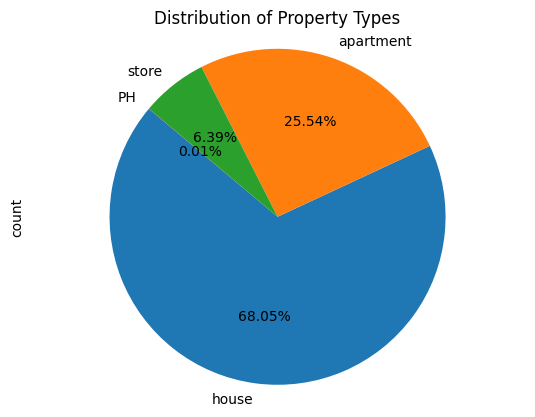

In [16]:
pie_plot(df, 'property_type', 'Distribution of Property Types')

The pie chart shows the distribution of property types in the dataset. It shows that __68.05%__ of the properties are classified as __House__, __25.54%__ as __Apartment__, __6.39%__ as __Store__, and only __0.01%__ as __PH__. This distribution shows the corresponding percentages of different property categories in the dataset, with house being the most common, followed by apartment and store, while PH accounts for a very small share.

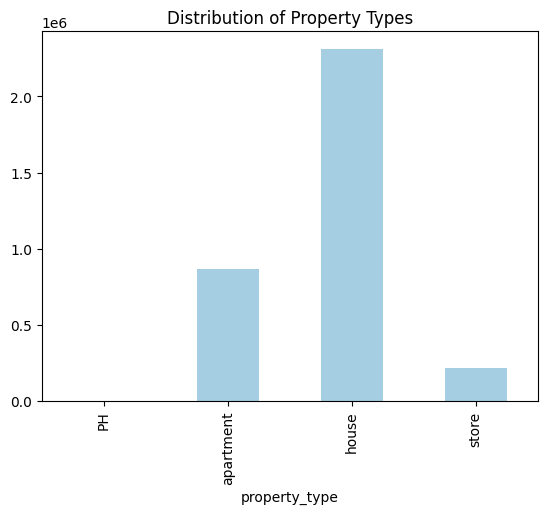

In [17]:
bar_plot(df, 'property_type', 'Distribution of Property Types')

- This bar graph visualises categorical data for property type. Each bar represents a category, and its height indicates the frequency or count of observations in that category.
- __1e6__ means that the value it represents is around 1 million or more.
- It shows that House is the most common property type, with a count of 2,311,213, followed by Apartment with 867,575 counts. Store and PH are less common, with counts of 217,137 and 496, respectively.

###### 3. Currency

In [18]:
df['currency'].describe()

count     3396421
unique          6
top           MXN
freq      3216003
Name: currency, dtype: object

In [19]:
df['currency'].value_counts()

currency
MXN    3216003
USD     180400
EUR          7
ARS          5
CLP          4
BRL          2
Name: count, dtype: int64

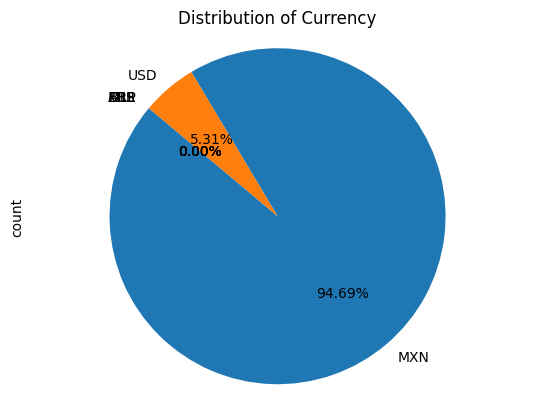

In [20]:
pie_plot(df, 'currency', 'Distribution of Currency')

The pie chart illustrates the currency distribution as percentages of the whole. The chart shows that the majority of currency transactions are in MXN, accounting for approximately 94.69% of the total transactions. USD makes up around 5.31% of the transactions, while EUR, ARS, CLP, and BRL each represent a very small percentage of less than 0.1% or approx 0.0% of the total currency transactions.

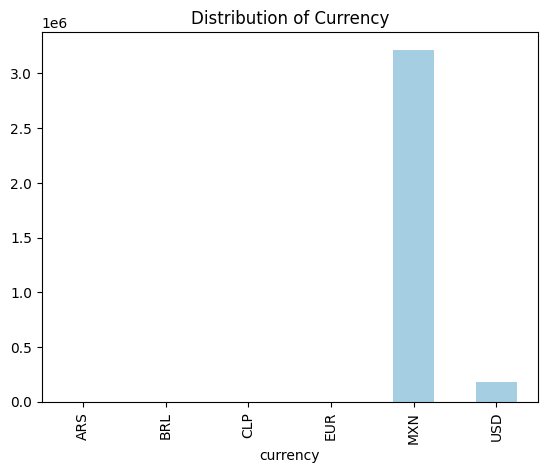

In [21]:
bar_plot(df, 'currency', 'Distribution of Currency')

The bar chart depicts the distribution of currency in the dataset, the x-axis represents different currency types (MXN, USD, EUR, ARS, CLP, BRL), while the y-axis shows the count of each currency. The bars vary in height based on the count, with MXN having the highest count followed by USD, EUR, ARS, CLP, and BRL.

###### 4. State Name

In [22]:
df['state_name'].describe()

count              3396421
unique                  33
top       Estado de México
freq                443232
Name: state_name, dtype: object

In [23]:
df['state_name'].value_counts()

state_name
Estado de México                   443232
Baja California                    329355
Querétaro                          256227
Veracruz de Ignacio de la Llave    246221
Morelos                            235764
Yucatán                            234211
Nuevo León                         220776
Distrito Federal                   207332
Puebla                             187530
Quintana Roo                       134352
Guerrero                           113113
Jalisco                            111541
Chiapas                             91569
Tamaulipas                          77723
Guanajuato                          69474
San Luis Potosí                     62156
Chihuahua                           60774
Sinaloa                             56587
Hidalgo                             44690
Tabasco                             39299
Aguascalientes                      28660
Baja California Sur                 23874
Durango                             23353
Sonora                 

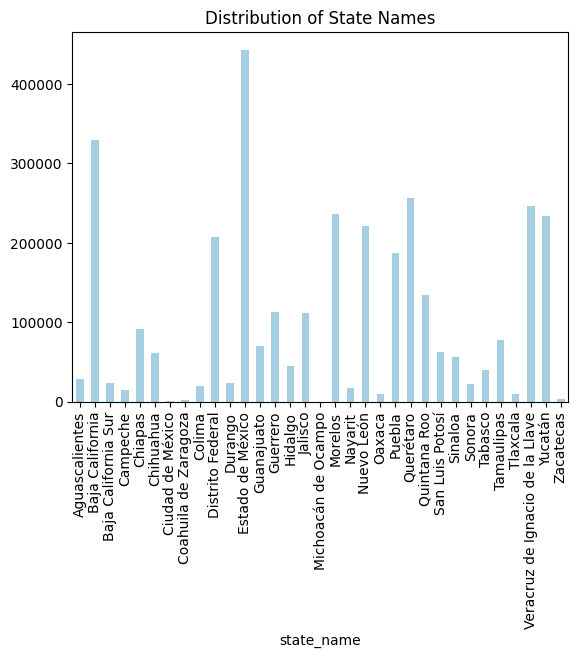

In [24]:
bar_plot(df, 'state_name', 'Distribution of State Names')

The bar chart displays the frequency of properties in different states. ___Estado de México___ has the highest number of properties with __443,232__, followed by __Baja California__ with __329,355__ properties. __Michoacán de Ocampo__ has the lowest number of properties with just __69__.

###### 5. Operation

In [25]:
df['operation'].describe()

count     3396421
unique          2
top          sell
freq      2762514
Name: operation, dtype: object

In [26]:
df['operation'].value_counts()

operation
sell    2762514
rent     633907
Name: count, dtype: int64

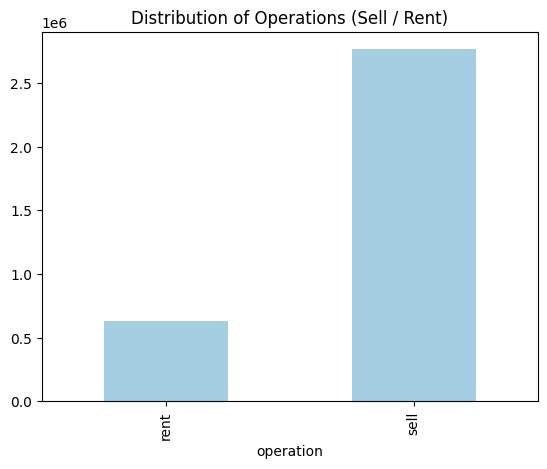

In [27]:
bar_plot(df, 'operation', 'Distribution of Operations (Sell / Rent)')

The operation __Sell__ has a frequency of ___2,762,514___, while __Rent__ has a frequency of ___633,907___.

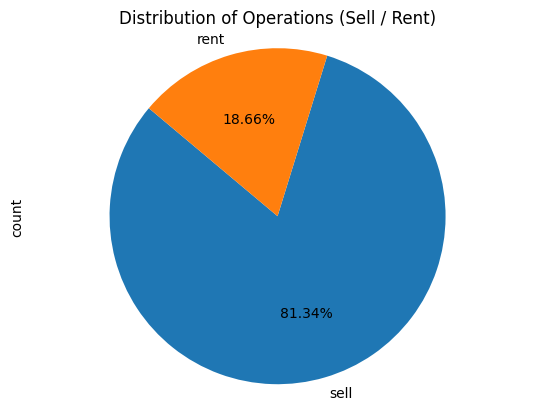

In [28]:
pie_plot(df, 'operation', 'Distribution of Operations (Sell / Rent)')

The __Sell__ operation dominates the market with a share of approximately ___81.34%___, while __Rent__ accounts for around ___18.66%___ of the total operations.

Observing the bar and the pie plot, we can assume that the real estate market primarily focuses on sales ("sell" operation) rather than rentals ("rent" operation), as indicated by the significantly higher frequency of "sell" operations compared to "rent" operations. This suggests that the majority of transactions in this dataset involve selling properties rather than renting them out.

##### (3.2) For Quantitative Variables

###### 1. price_usd_per_m2

In [29]:
df['price_usd_per_m2'].describe()

count    3.396421e+06
mean     7.536001e+02
std      1.073046e+03
min     -6.998428e+04
25%      7.536001e+02
50%      7.536001e+02
75%      7.536001e+02
max      3.706319e+05
Name: price_usd_per_m2, dtype: float64

The data has a large range(in Millions), from a minimum of -69984.28 to a maximum of 370631.85, indicating potential outliers.
The mean price per square meter is 753.60, with a standard deviation of 1073.05, suggesting a wide variation in prices.

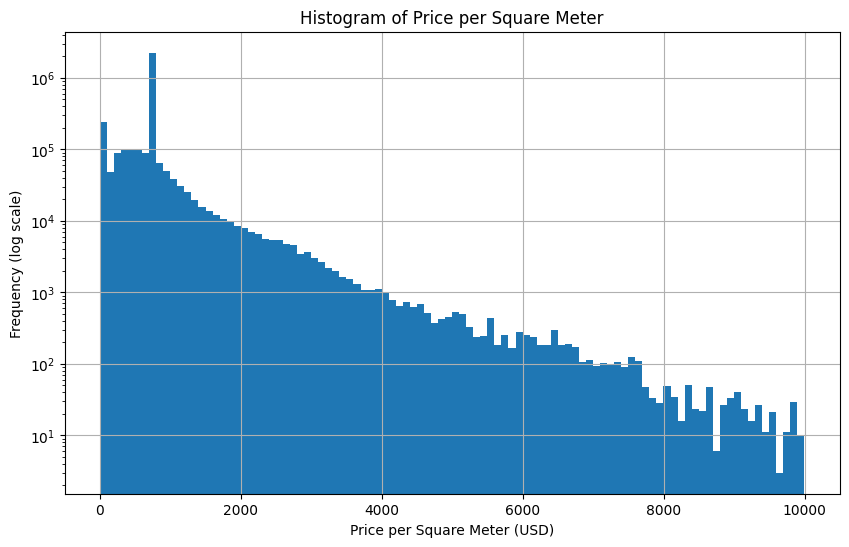

In [30]:
# Filtering the data to include prices within a reasonable range
filtered_data = df[(df['price_usd_per_m2'] > 0) & (df['price_usd_per_m2'] < 10000)]

# Ploting histogram with log scaling
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['price_usd_per_m2'], bins=100, log=True)
plt.xlabel('Price per Square Meter (USD)')
plt.ylabel('Frequency (log scale)')
plt.title('Histogram of Price per Square Meter')
plt.grid(True)
plt.show()

**Shape** - This histogram has a skewed right distribution.

**Spread** - The data runs from 0 to 10,000, hence the approximate range is 10,000.

The histogram of the price per square meter for (df['price_usd_per_m2'] > 0) & (df['price_usd_per_m2'] < 10000) , using log scaling, shows that the data is right-skewed, with a peak around 7.536001e+02. This suggests that a significant portion of the data falls within a relatively narrow range of prices per square meter.

In [31]:
print("\n Mode: ",df['price_usd_per_m2'].mode())
print("\n Mean: ",df['price_usd_per_m2'].mean())
print("\n Median: ",df['price_usd_per_m2'].median())


 Mode:  0    753.600113
Name: price_usd_per_m2, dtype: float64

 Mean:  753.6001130563553

 Median:  753.600113056355


- The mean, median and mode of the price per square meter is also 753.60, indicating that data is perfectly normal.


In [32]:
min_ = df['price_usd_per_m2'].min()
max_ = df['price_usd_per_m2'].max()
range_ = max_ - min_

print(f' \n Min = {min_} \n Max = {max_} \n Range = {range_}')

 
 Min = -69984.28 
 Max = 370631.853125 
 Range = 440616.13312500005


The range of the data is 440616.13, which is the difference between the maximum and minimum values.

In [33]:
Q25 = df['price_usd_per_m2'].quantile(0.25)
Q75 = df['price_usd_per_m2'].quantile(0.75)
IQR = Q75 - Q25

charges_outliers = df[(df.price_usd_per_m2 < Q25 - 1.5*IQR)|(df.price_usd_per_m2 > Q75 + 1.5*IQR)]['price_usd_per_m2']

print(f' \n Q25 = {Q25} \n Q75 = {Q75} \n IQR = {IQR}\n Number of Outliers = {len(charges_outliers)}')

 
 Q25 = 753.600113056355 
 Q75 = 753.600113056355 
 IQR = 0.0
 Number of Outliers = 1226410


The first quartile (Q1) is 753.600113056355.

The third quartile (Q3) is 753.600113056355.

The interquartile range (IQR) is 0.0.

There are potential outliers identified in the "price_usd_per_m2" variable with a count of 1226410.

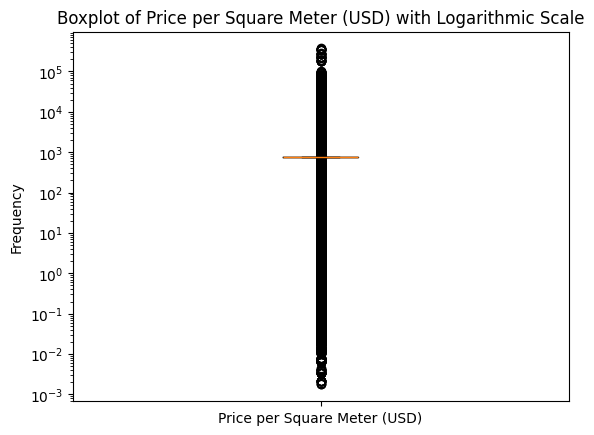

In [34]:
plt.boxplot(x=df['price_usd_per_m2'], labels = ['Price per Square Meter (USD)'])
plt.ylabel('Frequency')
plt.yscale('log')  # Set logarithmic scale on the y-axis
plt.title('Boxplot of Price per Square Meter (USD) with Logarithmic Scale')
plt.show()

The box plot displayed above represents the distribution of the 'Price per Square meter (usd)' in the dataset using a logarithmic scale on the y-axis. This logarithmic scale is particularly useful when dealing with data that has a wide range of values or when there are substantial outliers, as it compresses the scale to make extreme values more visible.

1. __Central Tendency__: The box plot shows that the median number of rooms is approximately 753.600113056355. However, due to the logarithmic scale, the first quartile (Q1) and third quartile (Q3) appear to be the same, both at 753.600113056355, resulting in an interquartile range (IQR) of 0.0. This suggests that most of the data points cluster around this central value.
   
2. __Outliers__: Despite the compact appearance of the box plot, the logarithmic scale helps identify potential outliers in the 'Rooms' variable. In this plot, the presence of 1226410 potential outliers is notable, as represented by individual points beyond the whiskers.
   
3. __Logarithmic Scale__: The logarithmic scale compresses the y-axis, making it easier to detect and visualize outliers despite the large dataset. This compression ensures that even extreme values are clearly displayed on the plot, providing a comprehensive view of the data distribution.

###### 2. rooms

In [35]:
df['rooms'].describe()

count    3.396421e+06
mean     2.865956e+00
std      2.037210e-01
min      1.000000e+00
25%      2.865956e+00
50%      2.865956e+00
75%      2.865956e+00
max      2.800000e+01
Name: rooms, dtype: float64

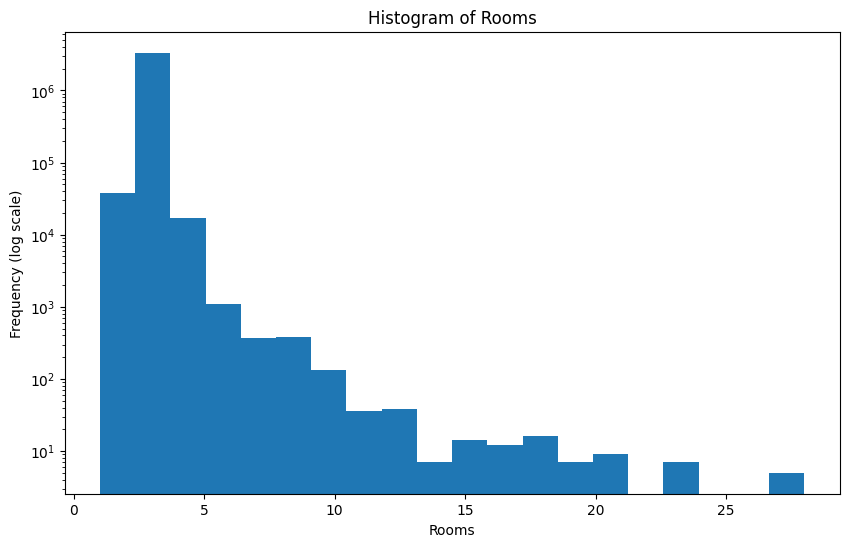

In [36]:
# Filter the data to include prices within a reasonable range
filtered_data = df['rooms']

# Plot histogram with log scaling
plt.figure(figsize=(10, 6))
plt.hist(x = df['rooms'], bins=20, histtype = 'bar', log = True)
plt.xlabel('Rooms')
plt.ylabel('Frequency (log scale)')
plt.title('Histogram of Rooms')
plt.show()

**Shape** - This histogram has a Symetric distribution. However, after using log-scalling we can observe, data as Right skewed.

**Spread** - The data runs from 1 to 28, hence the approximate range is 27. This suggests that a significant portion of the data falls within a relatively narrow range of rooms.


In [37]:
print("\n Mode: ",df['rooms'].mode())
print("\n Mean: ",df['rooms'].mean())
print("\n Median: ",df['rooms'].median())


 Mode:  0    2.865956
Name: rooms, dtype: float64

 Mean:  2.8659557200080252

 Median:  2.865955720008029


- The mean, median and mode of the price per square meter is also  2.865956, indicating that data is perfectly normal.

In [38]:
min_ = df['rooms'].min()
max_ = df['rooms'].max()
range_ = max_ - min_

print(f' \n Min = {min_} \n Max = {max_} \n Range = {range_}')

 
 Min = 1.0 
 Max = 28.0 
 Range = 27.0


The range of the data is 27.0, which is the difference between the maximum and minimum values.

In [39]:
Q25 = df['rooms'].quantile(0.25)
Q75 = df['rooms'].quantile(0.75)
IQR = Q75 - Q25

rooms_outliers = df[(df.rooms < Q25 - 1.5*IQR)|(df.rooms > Q75 + 1.5*IQR)]['rooms']

# Print summary statistics
print(f'Q25 = {Q25}\nQ75 = {Q75}\nIQR = {IQR}\nNumber of Outliers = {len(rooms_outliers)}')


Q25 = 2.865955720008029
Q75 = 2.865955720008029
IQR = 0.0
Number of Outliers = 114589


The first quartile (Q1) is 2.865955720008029 .

The third quartile (Q3) is 2.865955720008029 .

The interquartile range (IQR) is 0.0.

There are potential outliers identified in the "rooms" variable, with total count of 114589.

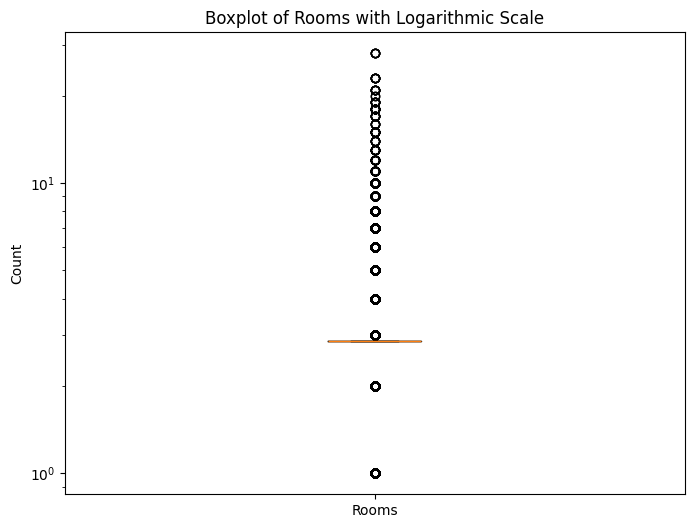

In [40]:
plt.figure(figsize=(8, 6))
plt.boxplot(x=df['rooms'], labels=['Rooms'])
plt.ylabel('Count')
plt.yscale('log')  # Set logarithmic scale on the y-axis
plt.title('Boxplot of Rooms with Logarithmic Scale')
plt.show()

The box plot displayed above represents the distribution of the 'Rooms' in the dataset using a logarithmic scale on the y-axis. This logarithmic scale is particularly useful when dealing with data that has a wide range of values or when there are substantial outliers, as it compresses the scale to make extreme values more visible.

1. __Central Tendency__: The box plot shows that the median number of rooms is approximately 2.865955720008029. However, due to the logarithmic scale, the first quartile (Q1) and third quartile (Q3) appear to be the same, both at 2.865955720008029, resulting in an interquartile range (IQR) of 0.0. This suggests that most of the data points cluster around this central value.
   
2. __Outliers__: Despite the compact appearance of the box plot, the logarithmic scale helps identify potential outliers in the 'Rooms' variable. In this plot, the presence of 114589 potential outliers is notable, as represented by individual points beyond the whiskers.
   
3. __Logarithmic Scale__: The logarithmic scale compresses the y-axis, making it easier to detect and visualize outliers despite the large dataset. This compression ensures that even extreme values are clearly displayed on the plot, providing a comprehensive view of the data distribution.

#### 4. Examining Relationships

In [41]:
def categorical_to_quantitative_col_stats(df: pd.DataFrame, colname: str, quan_name: str):
    print(f"\n - Descriptive stats for categorical variable \033[1m{colname.capitalize()}\033[0m and Quantitative response variable \033[1m{quan_name.capitalize()}\033[0m \n")
    print(tabulate(df.groupby(colname)[quan_name].describe().T, headers='keys', tablefmt='mixed_outline'))
    print(f"\n - Ploting side-by-side boxplot for categorical variable \033[1m{colname.capitalize()}\033[0m and Quantitative response variable \033[1m{quan_name.capitalize()}\033[0m")
    sns.boxplot(x = colname, y = quan_name, data = df)
    plt.yscale('log')

def categorical_to_categorical_relationship(df: pd.DataFrame, col1: str, col2: str, labels: list, xlabel: str, ylabel: str, title: str ):
    plot_df = pd.DataFrame()
    
    # Creating 2 way table 
    two_way_table = pd.crosstab(df[col1], df[col2])
    percentage_cols = []
    print(f'1. Two way table (contingency table) for \033[1m{col1}\033[0m and \033[1m{col2}\033[0m \n')
    display(two_way_table)
    
    # Calculating conditional percentages (%)
    print(f'\n2. Conditional Percentage \n')
    for col in two_way_table:
        total = two_way_table[col].sum()
        for index in two_way_table.index:
            two_way_table.loc[index, f'{col}_percentage'] = round((two_way_table.loc[index, col] / total) * 100, 2)
            percentage_cols.append(f'{col}_percentage')
    display(two_way_table)
    
    # Ploting Grouped bar chart with labels
    print(f'\n3. Ploting double-bar charts from conditional percentages for \033[1m{title}\033[0m \n')
    for cols in list(set(percentage_cols)):
        plot_df = pd.concat([plot_df, two_way_table[cols]], axis = 1)

    label_loc = np.arange(len(labels))
    width = 0.3
    multiplier = 0

    fig, ax = plt.subplots(layout = 'constrained', figsize = (10,7))
    for attribute, measurement in plot_df.items():
        offset = width * multiplier
        rects = ax.bar(label_loc + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3)
        multiplier += 1
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(label_loc + width, labels)
    ax.legend()
    plt.show()

def quan_to_quan_relationship_scatter_plot(df: pd.DataFrame, col1: str, col2: str, xlabel: str, ylabel: str):
    # calculate linear correlation between two quantitative variables
    corr_mat = np.corrcoef(df[col1],df[col2])
    r = corr_mat[0][1]

    # scatter plot for two quantitative variables
    print(f'\n Ploting Scatter plot chart for quantitative variable \033[1m{xlabel}\033[0m and \033[1m{ylabel}\033[0m\n')
    plt.scatter(df[col1], df[col2])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'r = {round(r, 4)}')

def quan_to_quan_relationship_with_list_square_regression_line(df: pd.DataFrame, col1: str, col2: str, xlabel: str, ylabel: str, cond: str):
    df_small = df.query(cond)
    
    # correlation
    r = np.corrcoef(df_small[col1], df_small[col2])[0][1]
    
    # calculate slope
    b = r*(np.std(df_small[col2])/np.std(df_small[col1]))
    
    # calculate intercept
    a = np.mean(df_small[col2]) - b*np.mean(df_small[col1])
    
    # regression line
    x = np.linspace(10,100)
    y = a + b*x
    
    # plot scatter
    plt.scatter(df_small[col1], df_small[col2])
    
    # plot regression line
    plt.plot(x, y, '-r', label=f'{col2}={round(a,3)} + {round(b,3)}*{col1}')
    plt.xlabel(xlabel, color='#1C2833')
    plt.ylabel(ylabel, color='#1C2833')
    plt.legend(loc='upper left')
    plt.title('Least Square Regression')



##### (4.1) Examining the relationship between categorical variable <b>property_type</b> and quantitative response variables <b>['price', 'rooms', 'expenses', 'surface_total_in_m2']</b> from dataset.</h3>


 - Descriptive stats for categorical variable Property_type and Quantitative response variable Price 

┍━━━━━━━┯━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━━━━━━┑
│       │            PH │        apartment │            house │            store │
┝━━━━━━━┿━━━━━━━━━━━━━━━┿━━━━━━━━━━━━━━━━━━┿━━━━━━━━━━━━━━━━━━┿━━━━━━━━━━━━━━━━━━┥
│ count │ 496           │ 867575           │      2.31121e+06 │ 217137           │
│ mean  │   7.72935e+06 │      2.28334e+06 │      2.87837e+06 │      1.57817e+06 │
│ std   │   5.8407e+06  │      6.85598e+06 │      6.05968e+06 │      7.4791e+06  │
│ min   │   0           │      0           │      0           │      0           │
│ 25%   │   3.7469e+06  │  50000           │ 650000           │   9500           │
│ 50%   │   6.7877e+06  │ 954800           │      1.69e+06    │  30000           │
│ 75%   │   1.12026e+07 │      2.64396e+06 │      3.2e+06     │      1.5e+06     │
│ max   │   5.3603e+07  │      9.45e+08    │      9.4575e+08  │   

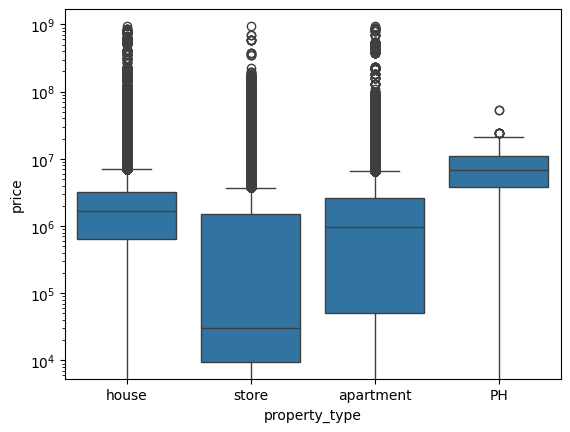

In [42]:
categorical_to_quantitative_col_stats(df, 'property_type', 'price')

- __Count__: The count indicates the number of records for each property type. There are 496 records for PH, 867,575 records for apartments, 2,311,210 records for houses, and 217,137 records for stores.

- __Mean__: The mean price varies significantly across property types. PH has the highest mean price at approximately 7,729,350 MXN, followed by houses at around 2,878,370 MXN, apartments at about 2,283,340 MXN, and stores at roughly 1,578,170 MXN.

- __Standard Deviation (Std)__: The standard deviation measures the dispersion of prices around the mean. PH and houses have relatively higher standard deviations compared to apartments and stores, indicating greater variability in prices within these property types.

- __Minimum and Maximum Prices__: The minimum price for each property type is 0 MXN, indicating potential data anomalies or entries with missing values. The maximum prices vary significantly, with PH reaching up to 53,603,000 MXN, apartments up to 945,000,000 MXN, houses up to 945,750,000 MXN, and stores up to 950,000,000 MXN.

- __Quartiles (25%, 50%, 75%)__: Quartiles provide insights into the price distribution within each property type. For example, in PH, 25% of the properties have prices below 3,746,900 MXN, 50% have prices below 6,787,700 MXN, and 75% have prices below 11,202,600 MXN. Similar interpretations can be made for apartments, houses, and stores based on their respective quartiles.


 - Descriptive stats for categorical variable Property_type and Quantitative response variable Rooms 

┍━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━━━━┯━━━━━━━━━━━━━━┯━━━━━━━━━━━━━━━┑
│       │         PH │    apartment │        house │         store │
┝━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━━━━┿━━━━━━━━━━━━━━┿━━━━━━━━━━━━━━━┥
│ count │ 496        │ 867575       │  2.31121e+06 │ 217137        │
│ mean  │   2.93468  │      2.84042 │  2.87576     │      2.86348  │
│ std   │   0.890624 │      0.19879 │  0.204003    │      0.207002 │
│ min   │   1        │      1       │  1           │      1        │
│ 25%   │   2.86596  │      2.86596 │  2.86596     │      2.86596  │
│ 50%   │   2.86596  │      2.86596 │  2.86596     │      2.86596  │
│ 75%   │   2.86596  │      2.86596 │  2.86596     │      2.86596  │
│ max   │  10        │     18       │ 23           │     28        │
┕━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━━━━━┷━━━━━━━━━━━━━━┷━━━━━━━━━━━━━━━┙

 - Ploting side-by-side boxplot for categorical variable Property_t

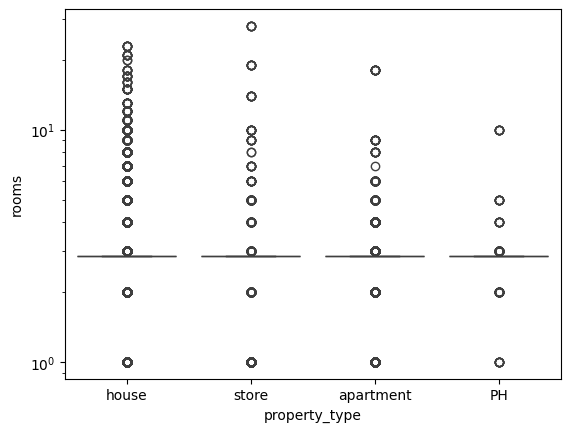

In [43]:
categorical_to_quantitative_col_stats(df, 'property_type', 'rooms')

- __Count__: The count indicates the number of records for each property type. There are 496 records for PH, 867,575 records for apartments, 2,311,210 records for houses, and 217,137 records for stores.

- __Mean__: The mean value indicates the average number of rooms for each property type. On average, PHs have approximately 2.93 rooms, apartments have around 2.84 rooms, houses have about 2.88 rooms, and stores have roughly 2.86 rooms.

- __Standard Deviation (Std)__: The standard deviation measures the spread or dispersion of the number of rooms around the mean. PHs and houses have slightly higher standard deviations compared to apartments and stores, suggesting greater variability in room numbers within these property types.

- __Minimum and Maximum Values__: The minimum and maximum values show the range of room numbers observed in each property type. For example, PHs have a minimum of 1 room and a maximum of 10 rooms, apartments range from 1 to 18 rooms, houses range from 1 to 23 rooms, and stores range from 1 to 28 rooms.

- __Quartiles (25%, 50%, 75%)__: Quartiles provide insights into the distribution of room numbers within each property type. The 25th, 50th (median), and 75th percentiles are all equal i.e 2.86596 for each property type, indicating that the distribution of room numbers is uniform within each category.


 - Descriptive stats for categorical variable Property_type and Quantitative response variable Expenses 

┍━━━━━━━┯━━━━━━━━━━┯━━━━━━━━━━━━━┯━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━┑
│       │       PH │   apartment │          house │      store │
┝━━━━━━━┿━━━━━━━━━━┿━━━━━━━━━━━━━┿━━━━━━━━━━━━━━━━┿━━━━━━━━━━━━┥
│ count │  496     │  867575     │    2.31121e+06 │ 217137     │
│ mean  │ 2635.29  │    2636.74  │ 2629.69        │   2629.92  │
│ std   │   41.944 │     557.787 │ 2649.03        │    703.753 │
│ min   │ 2631.51  │       1     │    1           │      1     │
│ 25%   │ 2631.51  │    2631.51  │ 2631.51        │   2631.51  │
│ 50%   │ 2631.51  │    2631.51  │ 2631.51        │   2631.51  │
│ 75%   │ 2631.51  │    2631.51  │ 2631.51        │   2631.51  │
│ max   │ 3100     │  156500     │    1.8e+06     │  70000     │
┕━━━━━━━┷━━━━━━━━━━┷━━━━━━━━━━━━━┷━━━━━━━━━━━━━━━━┷━━━━━━━━━━━━┙

 - Ploting side-by-side boxplot for categorical variable Property_type and Quantitative response variable Expens

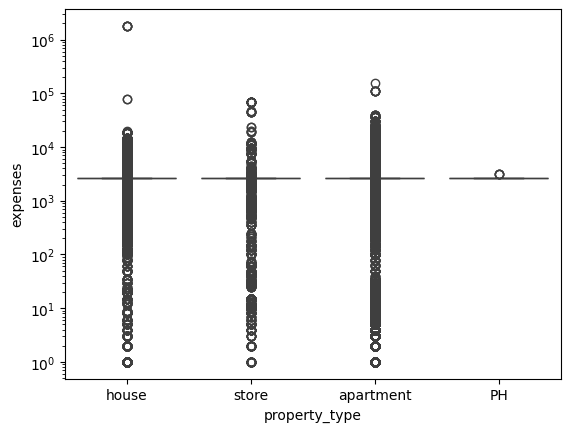

In [44]:
categorical_to_quantitative_col_stats(df, 'property_type', 'expenses')

- __Count__: The count indicates the number of records for each property type. There are 496 records for PH, 867,575 records for apartments, 2,311,210 records for houses, and 217,137 records for stores.

- __Mean__: The mean value indicates the average expenses for each property type. On average, PHs have expenses around 2635.29 units, apartments have expenses around 2636.74 units, houses have expenses around 2629.69 units, and stores have expenses around 2629.92 units.

- __Standard Deviation (Std)__: The standard deviation measures the spread or dispersion of expenses around the mean. Apartments and stores have higher standard deviations compared to PHs and houses, indicating greater variability in expenses within these property types.

- __Minimum and Maximum Values__: The minimum and maximum values show the range of expenses observed in each property type. For example, PHs have expenses ranging from 2631.51 to 3100 units, apartments range from 1 to 156,500 units, houses range from 1 to 1.8 million units, and stores range from 1 to 70,000 units.

- __Quartiles (25%, 50%, 75%)__: Quartiles provide insights into the distribution of expenses within each property type. The 25th, 50th (median), and 75th percentiles are all equal i.e 2631.51 for each property type, indicating that the distribution of expenses is uniform within each category.


 - Descriptive stats for categorical variable Property_type and Quantitative response variable Surface_total_in_m2 

┍━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━┯━━━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━┑
│       │        PH │   apartment │            house │      store │
┝━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━┿━━━━━━━━━━━━━━━━━━┿━━━━━━━━━━━━┥
│ count │   496     │  867575     │      2.31121e+06 │ 217137     │
│ mean  │   661.607 │     364.332 │    457.133       │    697.483 │
│ std   │  3802.71  │    2129.84  │   2110.13        │   4625.6   │
│ min   │    64     │      -4     │   -133           │      0     │
│ 25%   │   130     │      26     │    204           │     36     │
│ 50%   │   194.5   │     448.824 │    448.824       │    320     │
│ 75%   │   275     │     448.824 │    448.824       │    448.824 │
│ max   │ 32400     │  200000     │ 200000           │ 200000     │
┕━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━┷━━━━━━━━━━━━━━━━━━┷━━━━━━━━━━━━┙

 - Ploting side-by-side boxplot for categorical variable Property

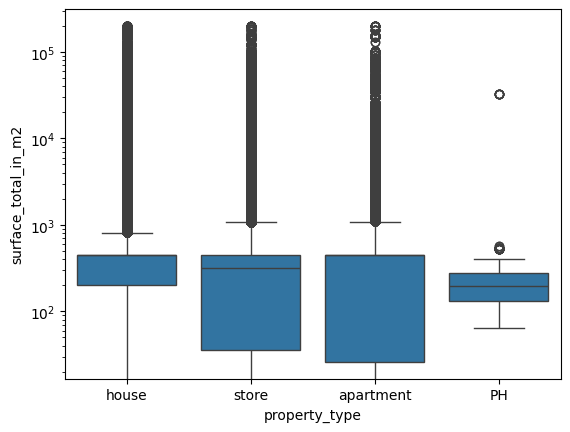

In [45]:
categorical_to_quantitative_col_stats(df, 'property_type', 'surface_total_in_m2')

- __Count__: The count indicates the number of records for each property type. There are 496 records for PH, 867,575 records for apartments, 2,311,210 records for houses, and 217,137 records for stores.

- __Mean__: The mean value indicates the average surface area in square meters for each property type. On average, PHs have a surface area of approximately 661.607 square meters, apartments have an average of 364.332 square meters, houses have an average of 457.133 square meters, and stores have an average of 697.483 square meters.

- __Standard Deviation (Std)__: The standard deviation measures the spread or dispersion of surface areas around the mean. PHs and stores have higher standard deviations compared to apartments and houses, indicating greater variability in surface areas within these property types.

- __Minimum and Maximum Values__: The minimum and maximum values show the range of surface areas observed in each property type. For example, PHs have surface areas ranging from 64 to 32,400 square meters, apartments range from -4 to 200,000 square meters, houses range from -133 to 200,000 square meters, and stores range from 0 to 200,000 square meters.

- __Quartiles (25%, 50%, 75%)__: Quartiles provide insights into the distribution of surface areas within each property type. The 25th, 50th (median), and 75th percentiles vary across property types, indicating different distributions of surface areas.

##### (4.2) Examining the relationship between categorical variables from the dataset (Property type and Operation)¶

1. Two way table (contingency table) for property_type and operation 



operation,rent,sell
property_type,,
PH,40,456
apartment,212600,654975
house,269670,2041543
store,151597,65540



2. Conditional Percentage 



operation,rent,sell,rent_percentage,sell_percentage
property_type,,,,
PH,40,456,0.01,0.02
apartment,212600,654975,33.54,23.71
house,269670,2041543,42.54,73.90
store,151597,65540,23.91,2.37



3. Ploting double-bar charts from conditional percentages for Percentage of Property Type with Operations 



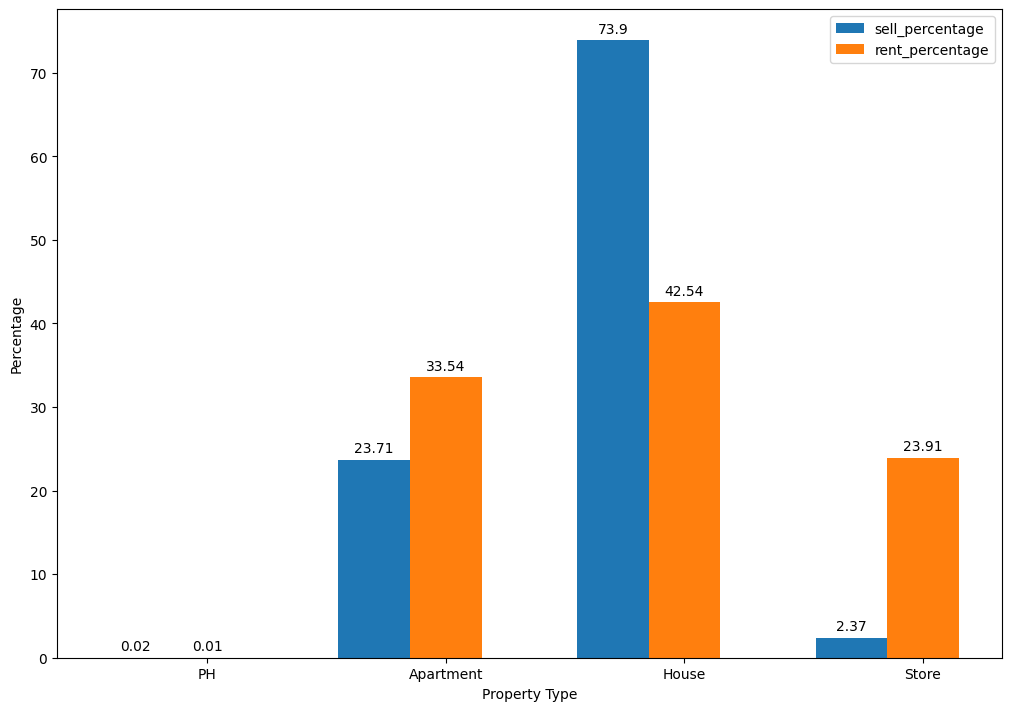

In [46]:
categorical_to_categorical_relationship(df = df,
                                        col1 = 'property_type',
                                        col2 = 'operation', 
                                        labels = ['PH', 'Apartment', 'House', 'Store'],
                                        xlabel = 'Property Type',
                                        ylabel = 'Percentage',
                                        title = 'Percentage of Property Type with Operations'
                                       )

Examining the conditional percentages for property types and operations reveals insightful patterns in the real estate market:

1. __PH Properties__:
    * Rental percentage: 0.01%
    * Sales percentage: 0.02%

PH properties have a minimal presence in the rental and sales market, with only a negligible percentage available for both operations.

2. __Apartments__:
    * Rental percentage: 33.54%
    * Sales percentage: 23.71%

Apartments show a higher inclination towards rentals, constituting 33.54% of all rental operations compared to 23.71% for sales.

3. __Houses__:
    * Rental percentage: 42.54%
    * Sales percentage: 73.90%

Houses exhibit a significant preference for sales, representing 73.90% of all sales operations. However, they also have a considerable share in the rental market, accounting for 42.54% of rental operations.

4. __Stores__:
    * Rental percentage: 23.91%
    * Sales percentage: 2.37%

Stores lean more towards rentals, comprising 23.91% of rental operations, while sales of stores are relatively low at 2.37%.

##### (4.3) Examining the relationship between Quantitative variables from the dataset (Rooms and Price/m2)


 Ploting Scatter plot chart for quantitative variable Rooms and Price per m2



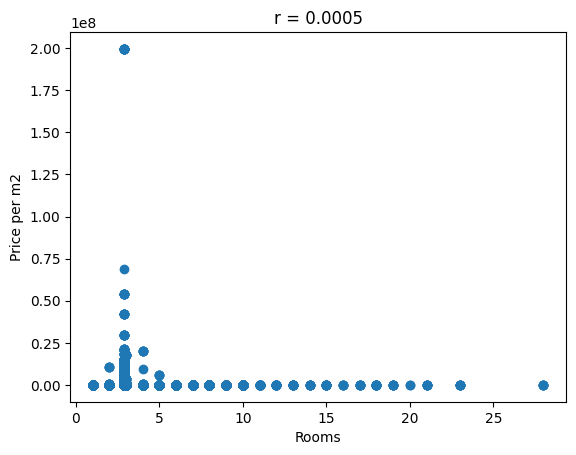

In [47]:
quan_to_quan_relationship_scatter_plot(
                          df = df, 
                          col1 = 'rooms', 
                          col2 = 'price_per_m2', 
                          xlabel = 'Rooms', 
                          ylabel = 'Price per m2')

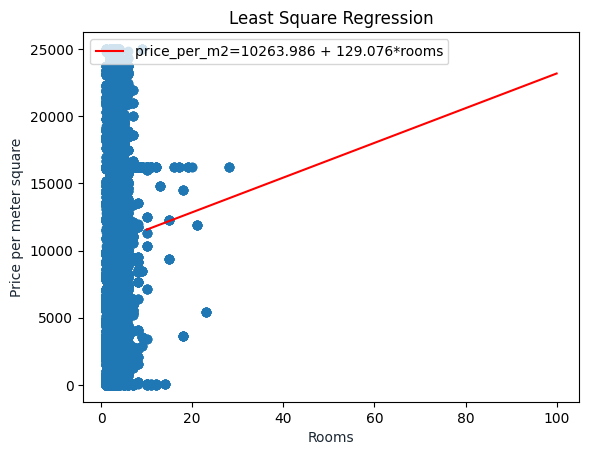

In [48]:
quan_to_quan_relationship_with_list_square_regression_line(
                          df = df, 
                          col1 = 'rooms', 
                          col2 = 'price_per_m2', 
                          xlabel = 'Rooms', 
                          ylabel = 'Price per meter square', 
                          cond = 'price_per_m2 <= 25000')

- __Scatter Plot__: The scatter plot shows a Rooms against their Price per meter Square charges.

- __Linear Correlation__: A correlation value of 0.0005 indicates a very weak linear relationship between the Rooms and price per m2 variables in a scatter plot.

- __Least Square Regression Line__: The slope of the line is positive, which means that there is a positive correlation between the price per square meter and the number of rooms. In other words, as the number of rooms in a hotel increases, the price per square meter of a room also tends to increase.

#### 5. Segmentation Analysis

In this section, we will perform segmentation analysis on the cleaned and preprocessed dataset.


##### __(5.1) Property Attributes: Price, Surface Total in m2, and Rooms, Operation__

In [49]:
# Selecting features for segmentation analysis
features = ['price', 'surface_total_in_m2', 'rooms', 'operation']

# Handling missing values if any
df_segmentation = df[features].dropna()

# One-Hot Encoding for 'operation' feature
df_segmentation = pd.get_dummies(df_segmentation, columns=['operation'])

# Normalizing data
normalized_data = (df_segmentation - df_segmentation.mean()) / df_segmentation.std()

# Performing K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_segmentation['segment'] = kmeans.fit_predict(normalized_data)

# Analyzing segments
segment_stats = df_segmentation.groupby('segment').mean()

# Displaying segment statistics
print(tabulate(segment_stats, headers='keys', tablefmt='psql'))

# Filter data for 'Rent' operation type
df_rent = df_segmentation[df_segmentation['operation_rent'] == 1]

# Calculate average price and surface total for each segment
segment_avg = df_rent.groupby('segment').mean()[['price', 'surface_total_in_m2']]

+-----------+-----------------+-----------------------+---------+------------------+------------------+
|   segment |           price |   surface_total_in_m2 |   rooms |   operation_rent |   operation_sell |
|-----------+-----------------+-----------------------+---------+------------------+------------------|
|         0 |     3.13897e+06 |               397.231 | 2.85756 |         0        |         1        |
|         1 |     1.33294e+07 |              9371.43  | 4.23608 |         0.126483 |         0.873517 |
|         2 | 94331.1         |               340.41  | 2.85137 |         1        |         0        |
+-----------+-----------------+-----------------------+---------+------------------+------------------+


- __Segment 0__: This segment primarily consists of properties with an average price of approximately 3.14 million, a surface area of around 397 square meters, and an average room count of about 2.86. Most properties in this segment are for sale (operation_sell = 1).

- __Segment 1__: This segment represents properties with a significantly higher average price of about 13.33 million and a larger surface area of approximately 9371 square meters. The average room count is around 4.24. Properties in this segment are mainly for sale (operation_sell = 0.87) but also include some for rent (operation_rent = 0.13).

- __Segment 2__: This segment includes properties with a much lower average price of around 94,331, a smaller surface area of about 340 square meters, and a similar room count as Segment 0 (approximately 2.85). Properties in this segment are mainly for rent (operation_rent = 1).

<Figure size 1000x600 with 0 Axes>

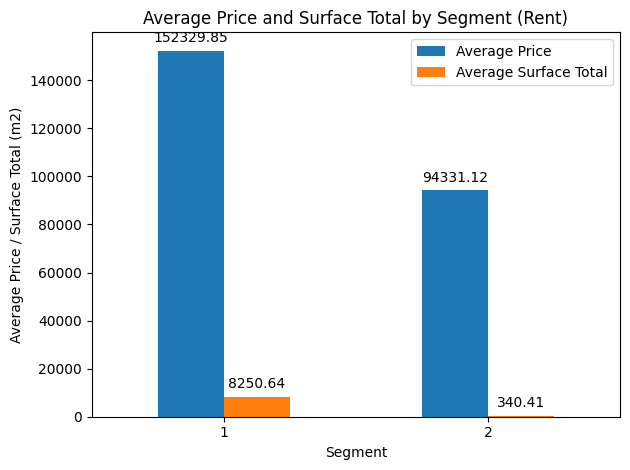

In [50]:
# Filtering data for 'Rent' operation type
df_rent = df_segmentation[df_segmentation['operation_rent'] == 1]

# Calculating average price and surface total for each segment
segment_avg = df_rent.groupby('segment').mean()[['price', 'surface_total_in_m2']]

# Plotting the bar chart with value annotations
plt.figure(figsize=(10, 6))
bar_plot = segment_avg.plot(kind='bar')
plt.xlabel('Segment')
plt.ylabel('Average Price / Surface Total (m2)')
plt.title('Average Price and Surface Total by Segment (Rent)')
plt.xticks(rotation=0)
plt.legend(['Average Price', 'Average Surface Total'])

# Annotate bars with values
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')

plt.tight_layout()
plt.show()

Based on the bar chart, we can depict that taller bar (segment 2) signify portions with higher average rental prices, indicating premium properties, while shorter bars (segment 2) represent portions with lower average prices, often associated with budget-friendly options.

 Now, after analysing the property attribute, can we conclude about the factors that may influence price:

##### 1. __Location:__

* __Neighborhood__: Properties in desirable neighborhoods with good amenities, schools, and low crime rates typically command higher prices.

* __Proximity to amenities__: Being close to parks, public transportation, shopping centers, or entertainment areas can increase a property's value.

* __Urban vs. Suburban vs. Rural__: Location type can significantly impact price. Urban areas with limited space often have higher prices per square meter compared to suburban or rural areas.

##### 2. __Property Characteristics:__

* __Age and condition__: Newer properties or those in excellent condition will generally sell/rent for more than older or run-down properties with the same surface area.
* __Number of bedrooms and bathrooms__: Properties with more bedrooms and bathrooms tend to be more expensive, as they cater to larger families or those seeking more space.
* __Special features__: Unique features like a swimming pool, fireplace, finished basement, or high-end finishes can significantly increase the price.

##### 3. __Market Conditions:__

* __Supply and demand__: In areas with high demand and low supply, property prices will generally be higher.
* __Interest rates__: Lower interest rates can make it more affordable for people to buy, potentially driving up prices.

_Overall, Location plays a significant role, with properties in desirable neighborhoods or close to amenities commanding higher prices. Property characteristics like age, condition, the number of bedrooms and bathrooms, and special features can also significantly impact value. Finally, market conditions like supply and demand and interest rates can influence overall property prices._

#### 6. Market Insights

In this section, we will observe Price distributions and Property type analysis, which will give us fruitfull insights of the market.

##### (6.1) Property Type Analysis

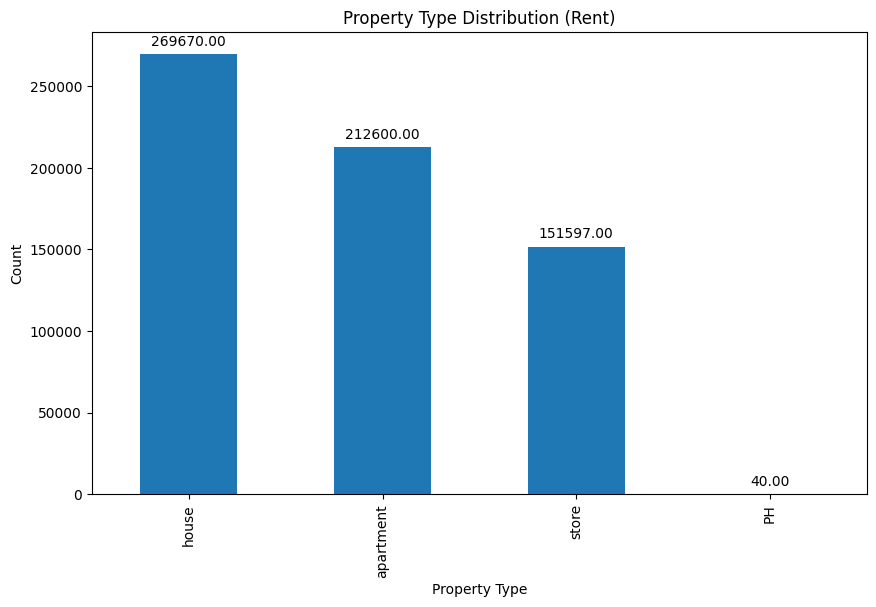

In [51]:
df_price_rent = df[df['operation'] == 'rent']
property_type_counts = df_price_rent['property_type'].value_counts()
plt.figure(figsize=(10, 6))
property_type_bar = property_type_counts.plot(kind='bar')
plt.title('Property Type Distribution (Rent)')
plt.xlabel('Property Type')
plt.ylabel('Count')
# Annotate bars with values
for p in property_type_bar.patches:
    property_type_bar.annotate(format(p.get_height(), '.2f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
plt.show()

- The most common property type is residential(House, Apartments), followed by commercial(Store) for rent.
- There are three times more residential properties than commercial properties.

#### 7. Recommendations

##### (7.1) Target State For Investment Identification: <ins> Identifying target state market based on demand and pricing trends</ins>

In [52]:
target_markets = df_price_rent.groupby('state_name')['price'].mean().sort_values(ascending=False).head(5)
print("\nTarget Markets for Investment Identification (Top 5 States by Average Price and operation type Rent):")
print(target_markets)



Target Markets for Investment Identification (Top 5 States by Average Price and operation type Rent):
state_name
Aguascalientes    262166.655219
Tamaulipas        238659.665027
Guanajuato        191290.682622
Sonora            149303.065971
Durango           122886.344574
Name: price, dtype: float64


The top 5 states identified as target markets are:

1. __Aguascalientes__: With an average property price of approximately 262,167 MXN, Aguascalientes stands out as a lucrative target market for real estate investment, indicating a strong demand for rental properties in this state.

2. __Tamaulipas__: Following closely, Aguascalientes boasts an average property price of around 238,660 MXN, making it another attractive target market characterized by a significant real estate market and potential investment opportunities.

3. __Guanajuato__: With an average property price of approximately 191,290 MXN, Guanajuato also emerges as a top target market, showcasing a robust real estate sector and potential for profitable ventures.

4. __Sonora__: Sonora features an average rental property price of about 149,303 MXN, positioning it as a promising target market with opportunities for real estate development and investment.

5. __Durango__: Rounding up the top 5, Durango has an average property price of roughly 122,886 MXN, indicating a vibrant real estate market and potential for growth and investment in the city.

##### (7.2) Marketing Strategies: <ins> Recommending effective marketing channels based on target state market and property type </ins>

In [53]:
marketing_strategies = df_price_rent.groupby(['state_name', 'property_type'])['id'].count().unstack().fillna(0)
print("\n Rental Marketing Strategies (Number of Properties by State and Property Type):")
print(marketing_strategies)


 Rental Marketing Strategies (Number of Properties by State and Property Type):
property_type                      PH  apartment    house    store
state_name                                                        
Aguascalientes                    0.0      485.0   2538.0   1821.0
Baja California                   0.0    31785.0  10128.0   9528.0
Baja California Sur               0.0      378.0    762.0   1112.0
Campeche                          0.0     1586.0   5068.0   1090.0
Chiapas                           0.0     2815.0   6631.0   4491.0
Chihuahua                         0.0     2878.0   4212.0   7034.0
Ciudad de México                  0.0       83.0      8.0      7.0
Coahuila de Zaragoza              0.0       52.0    125.0    148.0
Colima                            0.0      174.0    990.0    562.0
Distrito Federal                 13.0    24420.0   5375.0   6130.0
Durango                           0.0      512.0   1261.0   1601.0
Estado de México                  7.0    16858.0

Based on the number of rental properties by state and property type, we can derive a marketing strategies to:

- __Focus on High-Demand Property Types__: Concentrate marketing efforts on states with a high number of rental properties, such as __Veracruz de Ignacio de la Llave__, __Estado de México__, and __Nuevo León__, which have a significant number of apartments, houses, and stores for rent.


##### (7.3) Investment Opportunities: <ins> Identifying target markets based on demand and pricing trends</ins>

In [54]:
# Highlighting investment opportunities in emerging markets or property types
investment_analysis = df_price_rent.groupby('state_name')['price'].mean().sort_values(ascending=True).head(5)
print("\nInvestment Opportunities (Top 5 States for Rental Investment):")
print(investment_analysis)


Investment Opportunities (Top 5 States for Rental Investment):
state_name
Zacatecas               10715.933333
Coahuila de Zaragoza    10716.624615
Michoacán de Ocampo     12421.052632
Ciudad de México        13328.571429
Nayarit                 13642.127212
Name: price, dtype: float64


Based on the average rental prices and potential returns, the top 5 states for rental investment opportunities are:

1. __Zacatecas__: With an average rental price of approximately 10,716 MXN, Zacatecas offers attractive rental investment opportunities.

2. __Coahuila de Zaragoza__: This state also presents promising rental investment prospects, with an average rental price of around 10,717 MXN.

3. __Michoacán de Ocampo__: With an average rental price of approximately 12,421 MXN, Michoacán de Ocampo is another state to consider for rental investments.

4. __Ciudad de México__: The capital city offers good rental investment potential, with an average rental price of about 13,329 MXN.

5. __Nayarit__: With an average rental price of approximately 13,642 MXN, Nayarit rounds out the top 5 states for rental investment opportunities.

#### 8. Conclusion

Throughout this project, we have conducted a comprehensive analysis of the Real Estate Listings in Mexico dataset, focusing on exploring, analyzing, and deriving valuable insights to assist Properati's customers in making informed decisions about renting real estate properties in Mexico.

##### __1. Exploration and Data Understanding:__
- We began by thoroughly exploring the dataset, understanding its structure, and identifying key features such as property type, price, surface area, and location.
- This initial exploration laid the foundation for our subsequent analysis, ensuring a deep understanding of the data's characteristics.

##### __2. Data Preparation and Cleaning__:
- Handling missing data and ensuring data integrity were crucial steps in our analysis process.
- We employed appropriate techniques to address missing values, ensuring that our analysis was based on reliable data.

##### __3. Distribution, Relationship and Segment Analysis__:
- We examined the distribution of both categorical and quantitative columns, gaining insights into pricing trends, property types, and market dynamics.
- Segmenting the data based on property attributes allowed us to identify distinct market segments, each with its own characteristics and potential strategies.

##### __4. Market Insights and Recommendations__:
- Our analysis provided valuable market insights, including optimal pricing strategies based on property type and location.
- We identified target markets with high demand and pricing trends, enabling Properati's customers to focus their efforts effectively.
- Competitive analysis and marketing strategies were recommended to help customers stay competitive and reach their target audience efficiently.
- Additionally, we highlighted investment opportunities based on demand and pricing trends, offering strategic guidance for maximizing returns.




In conclusion, this project equips Properati's customers with actionable insights and recommendations, allowing them to make informed property rental and efficiently navigate the Mexican real estate rental market.
